In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras import datasets

In [144]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [145]:
def show_image (X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])


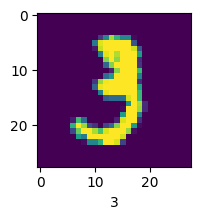

In [146]:
show_image(X_train,y_train,10)

In [147]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [148]:
X_train,X_test = X_train/255,X_test/255

In [149]:
y_train_reshaped = tensorflow.keras.utils.to_categorical(y_train,10)
y_test_reshaped = tensorflow.keras.utils.to_categorical(y_test,10)

In [150]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [151]:
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
image_rows, image_cols = X_train.shape[1], X_train.shape[2]

X_train_reshaped = X_train.reshape(num_samples_train, image_rows * image_cols)
X_test_reshaped = X_test.reshape(num_samples_test, image_rows * image_cols)

In [152]:
model = Sequential()


In [153]:
model.add(Input(shape=(image_rows * image_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [154]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
history=model.fit(X_train_reshaped,y_train_reshaped,epochs=5,batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8736 - loss: 0.4437
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9633 - loss: 0.1262
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0810
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9828 - loss: 0.0565
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9875 - loss: 0.0429
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9902 - loss: 0.0332
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9927 - loss: 0.0259
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9944 - loss: 0.0191
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9950 - loss: 0.0181
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9963 - loss: 0.0137
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 12/20
1875/1875 ━

In [159]:

y_pred = model.predict(X_test_reshaped)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [160]:
y_pred

array([[1.9826416e-13, 6.0501100e-13, 9.3472903e-11, ..., 9.9999994e-01,
        1.5018116e-10, 5.9011294e-09],
       [2.2510223e-18, 2.2311334e-14, 9.9999994e-01, ..., 1.2620080e-30,
        1.1918485e-13, 9.0896624e-23],
       [7.9810959e-15, 9.9999982e-01, 4.2991260e-08, ..., 1.5007249e-08,
        7.0098665e-08, 5.7472251e-13],
       ...,
       [6.0650935e-25, 1.6430445e-16, 3.5365808e-23, ..., 7.2570387e-11,
        2.9413130e-10, 2.1894242e-10],
       [6.3836928e-18, 1.9360476e-22, 4.8442408e-20, ..., 1.5444264e-18,
        4.9105031e-09, 2.3128359e-22],
       [1.9601990e-15, 1.4594646e-17, 1.1292178e-14, ..., 2.1352702e-25,
        3.4340694e-14, 4.4174350e-19]], dtype=float32)

In [161]:
prediction_idx = y_pred.argmax(1)

In [164]:
print(prediction_idx[:20])
print(y_test[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(confusion_matrix(y_test,prediction_idx))

[[ 974    1    1    1    0    0    1    0    1    1]
 [   0 1126    3    0    0    0    2    1    3    0]
 [   6    3 1012    0    2    0    0    4    5    0]
 [   1    3   15  967    0   10    1    2    8    3]
 [   3    4    7    0  955    0    2    1    3    7]
 [   2    1    0    4    0  875    2    1    5    2]
 [   7    3    3    0    1    5  938    0    1    0]
 [   1    6   12    0    0    1    0  997    6    5]
 [   3    1    3    2    1    2    0    0  959    3]
 [   3    4    0    2    5    5    0    4   12  974]]


In [168]:
print(classification_report(y_test,prediction_idx))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

